# implementing creation events
Tim Tyree<br>
7.6.2023

In [1]:
from lib.my_initialization import *
plt.plot([1]*4)
plt.close()
#reset matplotlib
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
mpl.rcParams.update(matplotlib.rcParamsDefault) #reset matplotlib

/Users/timothytyree/opt/miniconda3/envs/pyenv/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# define module

In [16]:
# @njit
def format_particles(frameno,t,x_values,y_values,pid_values,round_t_to_n_decimals=5):
    n_tips = x_values.shape[0]
    dict_out = {
        'frame':frameno,
        't': np.around(t,round_t_to_n_decimals),
        'n': n_tips,
        'x': x_values,
        'y': y_values,
        'particle':pid_values,
    }
    return dict_out

from numba import jit,njit
@njit
def normalRandom():
    return np.random.normal()

@njit
def uniformRandom():
    return np.random.uniform(0,1)
# normalRandom(),uniformRandom()

# @njit
# def levyRandom2D(alpha):
#     th = 2*np.pi*np.random.uniform(0,1)
#     ul = np.random.uniform(0,1)**(-1./alpha)
#     dWx = ul*np.cos(th)
#     dWy = ul*np.sin(th)
#     return np.array([dWx,dWy])
# dWx,dWy = stepscale*levyRandom2D(alpha)
# dWx,dWy 

# generate video of the LPM with creation

In [128]:
#recall death rates
kwargs = dict(data_fk_dir=f'{nb_dir}/data/full_results/data_fig4_vidmar_fk_tt.csv',
              data_lr_dir=f'{nb_dir}/data/full_results/data_fig4_vidmar_lr_tt.csv',
             min_num_particles=9)
dict_wjr = recall_death_rates_vidmar_rappel(**kwargs)
fk=dict_wjr['fk']
lr=dict_wjr['lr']
print(f"annihilation rate density powerlaw fits:")
dict_fit_death_fk = print_fit_power_law(x=fk['q'].values,y=fk['w'].values)
dict_fit_death_lr = print_fit_power_law(x=lr['q'].values,y=lr['w'].values)

annihilation rate density powerlaw fits:
m = 1.877234 +/- 0.024488
M = 5.572316 +/- 0.299027 Hz/cm^2; B=2.496963 +/- 0.039522
RMSE=0.1386 Hz/cm^2; R^2=0.9969; MPE=6.9910%; N=73
m = 1.637556 +/- 0.016847
M = 16.735599 +/- 0.829136 Hz/cm^2; B=5.587740 +/- 0.065801
RMSE=0.1340 Hz/cm^2; R^2=0.9973; MPE=7.2488%; N=100


In [150]:
#recall birth rates
birth_rate_dir_fk = f'{nb_dir}/data/full_results/data_fig4_timothy_fk_up2_rescaled_per_tt.csv'
birth_rate_dir_lr = f'{nb_dir}/data/full_results/data_fig4_timothy_lr_up2_rescaled_per_tt.csv'
df_birth_fk = pd.read_csv(birth_rate_dir_fk)
df_birth_lr = pd.read_csv(birth_rate_dir_lr)
#scale from kHz to Hz
df_birth_fk['w']*=1e3
df_birth_lr['w']*=1e3
# DONE: compute powerlaw fits of birth rates wjr
print(f"creation rate density powerlaw fits:")
dict_fit_birth_fk = print_fit_power_law(x=df_birth_fk['q'].values,y=df_birth_fk['w'].values)
dict_fit_birth_lr = print_fit_power_law(x=df_birth_lr['q'].values,y=df_birth_lr['w'].values)

creation rate density powerlaw fits:
m = 0.229594 +/- 0.010098
M = 0.864210 +/- 0.002349 Hz/cm^2; B=0.529597 +/- 0.020570
RMSE=0.0215 Hz/cm^2; R^2=0.9655; MPE=3.0209%; N=73
m = 0.714755 +/- 0.009768
M = 3.277073 +/- 0.102643 Hz/cm^2; B=5.262676 +/- 0.107278
RMSE=0.0417 Hz/cm^2; R^2=0.9971; MPE=4.2323%; N=62


In [151]:
Mp=dict_fit_birth_fk['M']
nup=dict_fit_birth_fk['m']

Mp=dict_fit_birth_lr['M']
nup=dict_fit_birth_lr['m']

In [152]:
# #DONE: recall creation information
# R_c_bar=0.7029 #+/-0.0049 cm FK
# R_c_bar=0.6667 #+/-0.0083 cm LR
#not used here

In [153]:
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
# levyRandom2D
# normalRandom
seed=1
#random number stream A
rs = RandomState(MT19937(SeedSequence(seed)))
#random number stream B
# rs = RandomState(MT19937(SeedSequence(987654321)))
np.random.seed(seed)

In [154]:
#DONE: copy annihilation algorithm here

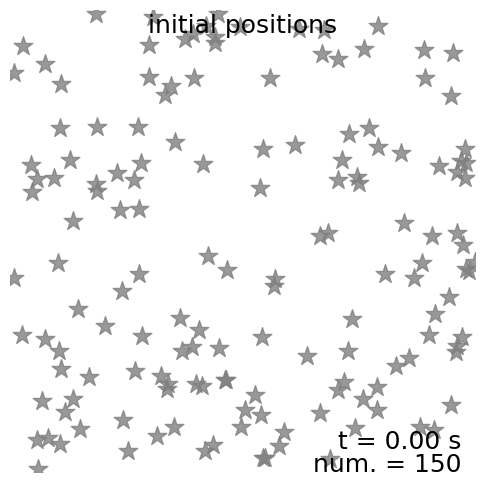

In [155]:
N=150
Nfinal=6 #~1m run time
Nfinal=0 #~3m play time
# Nfinal=2
L=5
# L=10
np.random.seed(42)
x_values=rs.uniform(size=N)*L
y_values=rs.uniform(size=N)*L
t=0
use_uniform_ic=True
use_uniform_ic=False
if use_uniform_ic:
    Nrow=4
#     Nrow=10
    #explicitely uniform ic.
    uvals=np.linspace(0,L*Nrow/(Nrow+1),Nrow)
    x_values,y_values=np.meshgrid(uvals,uvals)
    x_values=x_values.flatten()+L/(2*(Nrow+1))
    y_values=y_values.flatten()+L/(2*(Nrow+1))
    #explicitely enter ^these values in my c simulation and run it
    N = x_values.shape[0]
#return a scatter plot that may be saved as png
annotating=True
message='initial positions'
fig=ScatterPlotSnapshot(x_values,y_values,t,width=L,height=L,
                        annotating=annotating,message=message,inch=6)
plt.show()

In [156]:
#for snapshot output
save_folder=f"{nb_dir}/Figures/mov"
if os.path.exists(save_folder):
    #cleanse the old snapshot folder
    shutil.rmtree(save_folder)
os.mkdir(save_folder)
    
frameno=1
save_fn=None
inch=6
annotating=True

# message='without forces'
# force_code=0
# varkappa=0
# message='with anti-spring forces'
# force_code=1
# varkappa=-5
message='with particle creation'
force_code=2
# varkappa=1.552

In [157]:
#define model parameters
# #FK
# r=0.7 #cm 
# varkappa=1.552 #cm^2/s
# D=0.115 #cm^2/s
# # save_every=25
# save_every=5
# # save_every=1 #45 min

#LR
r=0.314 #cm 
varkappa=9.3 #cm^2/s
D=0.42 #cm^2/s
save_every=5 
# save_every=1
# save_every=1000000000
# varkappa=0 #no attraction

kappa=1e5 #Hz
# kappa=75 #Hz
Dt=1e-5;dt=1e-5
# tmax=500
tmax=1 #s

#for forces
x0=5
# no_repulsion=1
# no_attraction=1
no_repulsion=0
no_attraction=0
seed=123456789
#skipping reflect,set_second, and neighbor functionality

#define constants
alpha=1. #ballistic
alpha=2. #diffusive
# alpha=1.5 #levy-esque  #gives wrong annihilation rates

In [158]:
L

5

In [ ]:
# message=f'with {alpha=}'
message=' '
stepscale=np.sqrt(2*D*Dt) #diffusive
# stepscale=(2*D*Dt)**(1/alpha)
probreact=kappa*dt
T_net=0;count_net=0
np.random.seed(seed)
dist_cutoff=1e-2
iter_per_movestep = round(Dt/dt)
impulse_prefactor= varkappa * Dt
tiarray=np.zeros(N)
tfarray=np.zeros(N)
epsilon=5e-2  #reactions happen
creation_duration = 0.0025 # 0.001 #s  # 0.1 #s
chi=20. # unitless value >1.  = repulsion_strength / attraction_strength
use_pair_create=True
use_pair_create=False
# epsilon=5e-4  #reactions happen?
#heretim
#for csv output
data_folder=f"{nb_dir}/data/local_results/creation_test"
if not os.path.exists(data_folder):
    os.mkdir(data_folder)
data_folder=data_folder+"/Log"
if not os.path.exists(data_folder):
    os.mkdir(data_folder)
data_fn=f"pbc_seed_{seed}_fc_{force_code}_r_{r}_D_{D}_L_{L}_kappa_{kappa}_varkappa_{varkappa}_alpha_{alpha}_creatdur_{creation_duration}_chi_{chi}_log.csv"

step=0
recording_locations=True
recording_snapshots=True
# recording_locations=False
# recording_snapshots=False
print("running simulation...");
t=-Dt
# still_running=True;
exit_code=-1;T=-9999.
#initialize positions
# #uniform random ic
# x_values=rs.uniform(size=N)*L
# y_values=rs.uniform(size=N)*L
# #explicitely uniform ic
# uvals=np.linspace(0,L,5)
# x_values,y_values=np.meshgrid(uvals,uvals)
# x_values=x_values.flatten()
# y_values=y_values.flatten()

#lower case: world coordinates
#upper case: material coordinates
x=x_values.copy()
y=y_values.copy()
x_old=x_values.copy()
y_old=y_values.copy()
x_new=x_values.copy()
y_new=y_values.copy()
X=x_values.copy()
Y=y_values.copy()
X_old=x_values.copy()
Y_old=y_values.copy()
X_new=x_values.copy()
Y_new=y_values.copy()
zeros=np.zeros_like(x_values)
zerosint=np.zeros_like(x_values).astype('int')
still_running=zerosint==zerosint
caught=zerosint.copy()-9999#!=zerosint
anticaught=zerosint.copy()-9999#!=zerosint
# //start set_second kernel
# //end set_second kernel
#make still_running into still_running_values
dict_out_lst=[]
# reset the net forces
Fx_net=zeros.copy()
Fy_net=zeros.copy()
# while(still_running.any()):
while(still_running.sum()>Nfinal):
    # //reinitialize_kernel, which copies X,Y_new to X,Y_old
    min_dist_old=zeros+9999999
    i_neighbor=zerosint-1
    x_old=x_new
    y_old=y_new
    t=t+Dt;

    #sum_each_force_kernel
    for i in range(N):
        if(still_running[i]):
            for j in range(i+1,N):
                if(still_running[j]):
                    #compute displacement vector with pbc
                    dx = subtract_pbc_1d(x_old[j],x_old[i],L);
                    dy = subtract_pbc_1d(y_old[j],y_old[i],L);
                    dist2=dx*dx+dy*dy;
                    if (dist2<1e-8):
                        dist2=float(1e-8)
                    dist = np.sqrt(dist2)
                    #compute displacement due to drift
                    impulse_factor=0.
                    if (force_code==1):
                      #spring
                      impulse_factor=impulse_prefactor*(dist-x0)/dist;
                    if (force_code==2):
                      #QED2: force ~ inverse power law
                      impulse_factor=impulse_prefactor/dist2;
                    if (force_code==3):
                      #QED3: force ~ inverse square power law
                      impulse_factor=impulse_prefactor/dist2/dist;
                    #set impulse_factor to zero if it is explicitly forbidden by the user input
                    if ((no_attraction==1) & (impulse_factor>0)):
                        impulse_factor=0.
                    if ((no_repulsion==1) & (impulse_factor<0)):
                        impulse_factor=0.
                    #sum Fx_net, Fy_net according to a symplectic (momentum conserving) integrator
                    Fx_net[i]=Fx_net[i]+dx*impulse_factor;
                    Fy_net[i]=Fy_net[i]+dy*impulse_factor;
                    Fx_net[j]=Fx_net[j]-dx*impulse_factor;
                    Fy_net[j]=Fy_net[j]-dy*impulse_factor                    
                    #determine if they are closer than epsilon
                    if dist<epsilon:
                        #remove if they are
                        still_running[i]=False
                        still_running[j]=False
                        #heretim
                        uncatch_set=set()
                        if caught[i]>=0: 
                            uncatch_set.update([caught[i]])
                            if caught[caught[i]]>=0:
                                uncatch_set.update([caught[caught[i]]])
                        if caught[j]>=0: 
                            uncatch_set.update([caught[j]])
                            if caught[caught[j]]>=0:
                                uncatch_set.update([caught[caught[j]]])
                        if len(uncatch_set)>0:
                            for k in uncatch_set:
                                caught[k]=-9999
    #compute the one_step given the net force, F_net
    for i in range(N):
        if(still_running[i]):
            if caught[i]<0:
                dxt=Fx_net[i];
                dyt=Fy_net[i];
                # compute displacement due to levy flight
#                 dxW,dyW = stepscale*levyRandom2D(alpha)
                dxW = stepscale*normalRandom()
                dyW = stepscale*normalRandom()
                # next spatial position, time integrating by a duration, Dt. enforce PBC.
                x_new[i]=periodic(x_old[i]+dxW+dxt,L);
                y_new[i]=periodic(y_old[i]+dyW+dyt,L);
            else:
                j=caught[i]
                ti=tiarray[i]
                tf=tfarray[i]            
                #compute displacement vector with pbc
                dx = subtract_pbc_1d(x_old[j],x_old[i],L)
                dy = subtract_pbc_1d(y_old[j],y_old[i],L)      
                xl = dx - (x_old[j]-x_old[i])
                yl = dy - (y_old[j]-y_old[i])
                #compute average location
                xavg = x_old[i] + 0.5*dx 
                yavg = y_old[i] + 0.5*dy
                #compute frac to interpolate by
                frac = (t-ti)/(tf-ti)
                frac = np.min((1,frac))
                x_new[i] = periodic(x_old[i]*(1-frac) + (xavg+xl)*frac,L)
                y_new[i] = periodic(y_old[i]*(1-frac) + (yavg+yl)*frac,L)
    #reaction_kernel
    for i in range(N):
        if(still_running[i]&(caught[i]<0)):
            # // each i,j pair is reached once per call to kernel_measure
            for j in range(i+1,N):
                if(still_running[j]&(caught[j]<0)):
                    # // compute distance between particles that are still running
                    dist=dist_pbc(x_new[i],y_new[i],x_new[j],y_new[j],L);
                    in_range=dist<r;
                    # // in_range=true;//uncomment for smeared method
                    # // if two particles are in range
                    if(in_range):
                        # // determine whether those two particles react via the simple method
                        reacts=probreact>uniformRandom();
                        # // determine whether those two particles react via the smeared method
                        # // sig=sigmoid(dist, r, beta);
                        # // reacts=probreact*sig>uniformRandom();
                        if(reacts):
                            exit_code=1;
                            T=t;
#                             still_running[i]=False;
#                             still_running[j]=False;
                            #uncatch any previous catches
                            if caught[i]>=0: caught[caught[i]]=-9999
                            if caught[j]>=0: caught[caught[j]]=-9999
                            #catch these two
                            caught[i]=j;
                            caught[j]=i;
                            #determine deltat
                            deltat = dist**2/(4*(varkappa+2*D))
                            #determine ti,tf
                            tiarray[i]=t
                            tfarray[i]=t+deltat
                            tiarray[j]=t
                            tfarray[j]=t+deltat

    
    #TODO: determine rate_of_creation from average density
    num_particles = np.sum(still_running)
    A = L**2
    prob_create = dt * Mp * (num_particles / A) ** nup * A
    #creation_kernel
    if prob_create>np.random.uniform():
        if np.sum(~still_running)>=2:
            #select the first two particles that are removed
            igone=np.argwhere(~still_running)
            np.random.uniform(2)
            #set their positions to 2 uniformly distributed positions
            x_new[igone[0]]=np.random.uniform()*L
            x_new[igone[1]]=np.random.uniform()*L
            y_new[igone[0]]=np.random.uniform()*L
            y_new[igone[1]]=np.random.uniform()*L
            still_running[igone[0]]=True
            still_running[igone[1]]=True
            caught[igone[0]]=-9999
            caught[igone[1]]=-9999
            anticaught[igone[0]]=igone[1]
            anticaught[igone[1]]=igone[0]
            #optionally set their positions to average to one random location
            if use_pair_create:
                theta=2*np.pi*np.random.uniform()
                x_new[igone[1]]=x_new[igone[0]] + 2.*r*np.cos(theta)
                y_new[igone[1]]=y_new[igone[0]] + 2.*r*np.sin(theta)
            tfarray[igone[0]]=t+creation_duration
            tfarray[igone[1]]=t+creation_duration
    #DONT: set prob_create = dt*rate_of_creation/num_particles to a constant for each particle
    #TODO: place a pair of particles uniformly on the circle of radius Rcbar from the particle
    #TODO: repell those particles with a 1/R force that disappears exponentially fast
    
    # reset the net forces
    Fx_net=zeros.copy()
    Fy_net=zeros.copy()
    #creation_force_kernel
    if use_pair_create:
        for i in range(N):
            if(still_running[i]&(anticaught[i]>=0)):
                j = anticaught[i]
                if still_running[j]:
                    #compute displacement vector with pbc
                    dx = subtract_pbc_1d(x_old[j],x_old[i],L);
                    dy = subtract_pbc_1d(y_old[j],y_old[i],L);
                    dist2=dx*dx+dy*dy;
                    if (dist2<1e-8):
                        dist2=float(1e-8)
                    dist = np.sqrt(dist2)
                    #compute displacement due to drift
                    impulse_factor=0.
                    if (force_code==1):
                      #spring
                      impulse_factor=impulse_prefactor*(dist-x0)/dist;
                    if (force_code==2):
                      #QED2: force ~ inverse power law
                      impulse_factor=impulse_prefactor/dist2;
                    if (force_code==3):
                      #QED3: force ~ inverse square power law
                      impulse_factor=impulse_prefactor/dist2/dist;
                    #set impulse_factor to zero if it is explicitly forbidden by the user input
                    if ((no_attraction==1) & (impulse_factor<0)):
                        impulse_factor=0.
                    if ((no_repulsion==1) & (impulse_factor>0)):
                        impulse_factor=0.
                    #account for double counting and then scale
                    impulse_factor*=0.5*chi
                    #sum Fx_net, Fy_net according to a symplectic (momentum conserving) integrator
                    Fx_net[i]=Fx_net[i]-dx*impulse_factor;
                    Fy_net[i]=Fy_net[i]-dy*impulse_factor;
                    Fx_net[j]=Fx_net[j]+dx*impulse_factor;
                    Fy_net[j]=Fy_net[j]+dy*impulse_factor 
    
    #turn off creation array
    for i in range(N):
        if still_running[i] and anticaught[i]>=0:
            if t>tfarray[i]:
                anticaught[i]=-9999
                    
    if step%save_every==0:
        x_plot=x_new[still_running]
        y_plot=y_new[still_running]
        c_plot = np.array(['gray']*y_plot.shape[0])
        caugh=caught[still_running]
        for i in range(y_plot.shape[0]):
            if caugh[i]>=0:
                c_plot[i]='r'
        acaugh=anticaught[still_running]
        for i in range(y_plot.shape[0]):
            if acaugh[i]>=0:
                c_plot[i]='g'
                
        if recording_snapshots:
            #save result as png
            SaveScatterPlotSnapshot(x_plot,y_plot,t,
                                    c=c_plot,
                                    width=L,height=L,
                            frameno=frameno,save_folder=save_folder,
                            annotating=annotating,message=message)
#             print(f"- saved pic at {frameno=}")
        if (recording_locations)&(x_plot.shape[0]>0):
            pid_values = np.arange(x_values.shape[0])[still_running]
            #append particle locations to log, dict_out_lst
            dict_out=format_particles(frameno,t,x_plot,y_plot,pid_values=pid_values)
            dict_out_lst.append(dict_out)
    
        frameno+=1

    #shut simulation down if it's taking too long...
    if (t>tmax):
        for i in range(N):
            still_running[i]=False;
            exit_code=-99;
    
    step+=1
    #end while running
    
#record this trial
if (exit_code>0):
    if (T>0.):
        T_net=T_net+T;
        count_net=count_net+1;
    
print(f"simulation complete!")
beep(1)

running simulation...


In [ ]:
#save particle locations as csv
saving=recording_locations
# saving=False
printing=True
df = pd.concat([pd.DataFrame(dict_out) for dict_out in dict_out_lst])
df.reset_index(inplace=True, drop=True)
if saving:
    #save the recorded data
    os.chdir(data_folder)
    df.to_csv(data_fn, index=False)
    if printing:
        print('saved to:')
        print(os.path.abspath(data_fn))
    #     #if the end of AF was indeed reachded, append a row recording this
    #     if n_tips==0:
    #         next_id = df.index.values[-1]+1
    #         df = pd.concat([df,pd.DataFrame({'t': float(save_every_n_frames*h+t),'n': int(n_tips)}, index = [next_id])])
    #save the recorded data
#     #     df.round(round_output_decimals).to_csv(data_dir_log, index=False)
#     if printing:
#         print('saved to:')
#         print(data_dir_log)

In [ ]:
print(os.path.abspath(data_fn))

In [ ]:
#concatenate the folder of .png files
os.chdir(f'{nb_dir}/../vid/src')
os.system(f'./concat_folder_png.sh');

In [ ]:
os.system(f'open {nb_dir}/../vid/mov/out.mov')

In [143]:
10000/241
0.1/40

0.0025

In [144]:
#Q: why aren't I seeing them pull together slowly?
print(f'annihilation duration: {deltat/dt=:.0f} steps')
print(f'annihilation duration: {deltat/dt/save_every=:.0f} frames')
print(f'creation duration: {creation_duration/dt=:.0f} steps')

annihilation duration: deltat/dt=233 steps
annihilation duration: deltat/dt/save_every=47 frames
creation duration: creation_duration/dt=250 steps


In [145]:
#TODO: determine rate_of_creation from average density
#TODO: set prob_create = dt*rate_of_creation/num_particles to a constant for each particle
#TODO: if prob_create>prob():
#TODO: place a pair of particles uniformly on the circle of radius Rcbar from the particle
#TODO: repell those particles with a 1/R force that disappears exponentially fast

In [146]:
beep(3)

-n 
-n 
-n 


0

In [147]:
#TODO: print termination time
print(f"termination time: {t:.4f} s")
#TODO: wrap this into a function that generates a termination time
#TODO: abstract ^this to map a random seed to a termination time
#TODO: use multiprocessing overnight to get a distribution of termination times generated
#TODO: print the mean of this distribution. record.
#TODO: repeat for FK model
#TODO: type all this up using as few of words as possible.

termination time: 0.5911 s
